<a href="https://colab.research.google.com/github/tottenjordan/MultiStep_TimeSeries/blob/master/powerUsage/powerUsage_dataprep1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

in colab, use **high ram session**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Household Power Consumption Dataset
UCI Machine Learning [Repo](http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption)

* multivariate time series dataset describing the electricity consumption for a single household over four years
* data collected between Decemember 2006 and November 2010
* data collection frequency = 1 minute
* variables:
> * **global_active_power** : total active power consumed by household (kilowatts)
> * **global_reactive_power** : total reactive power consumed by the household (kilowatts)
> * **voltage** : average volts 
> * **global_intensity** : average current intensity (amps)
> * **sub_meetering_1** : active energy for kitchen (watt-hours)
> * **sub_meetering_2** : active energy for laundry (watt-hours)
> * **sub_meetering_3** : active energy for climate control systems (watt-hours)

***Active energy*** : real power consumed by the household \
***Reactive energy*** : unused power in the lines

## pip & package

In [0]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot

## load and prepare data

In [7]:
# load all data
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/power-usage/household_power_consumption.txt', sep=';', 
                      header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

print(dataset.shape)
dataset.head()

(2075259, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [0]:
# replace "?" with nan
dataset.replace('?', np.nan, inplace=True)

* dataset provides active power and some divison of the active power by main circuit in the house, e.g., kitchen, laundry, climate control
* these are not all circuits in household
* remaining watt-hours can be calculated from the active energy in watt-hours as follows:

>> sub_metering_remainder = (global_active_power * 1000 / 60) - (sub_metering_1 + sub_metering_2 + sub_metering_3)

In [0]:
# add column for remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

# save updated dataset
dataset.to_csv('/content/drive/My Drive/Colab Notebooks/power-usage/household_power_consumption.csv')

In [10]:
# dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,43.099998


In [3]:
# load & validate new dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/power-usage/household_power_consumption.csv', 
                  header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

print(df.shape)
df.head()

(2075259, 8)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


## Time series


* high-level view of the 4 years
* notice sub_meetering_3 (climate control) 
* sub_meetering_4 seems to decrease with time

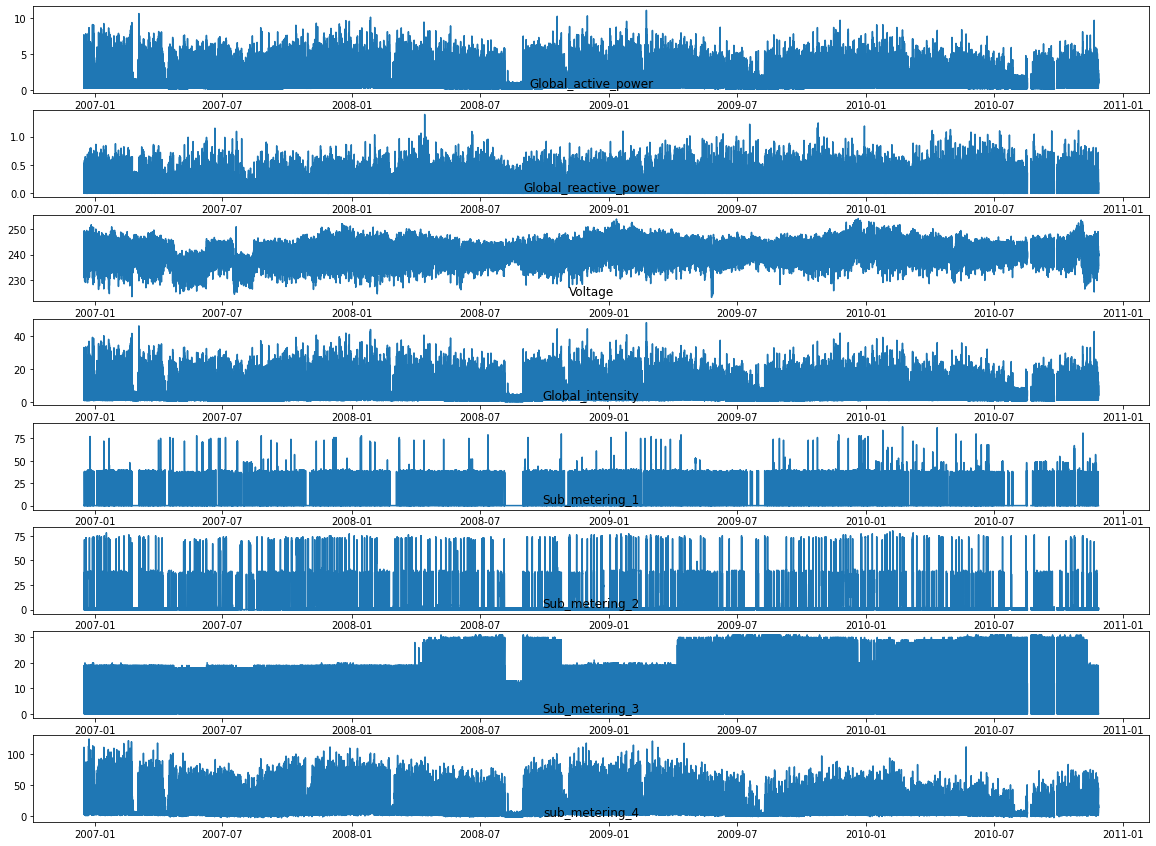

In [4]:
# create line plots 
pyplot.figure(figsize=(20, 15))
for i in range(len(df.columns)):
	pyplot.subplot(len(df.columns), 1, i+1)
	name = df.columns[i]
	pyplot.plot(df[name])
	pyplot.title(name, y=0)
 
pyplot.tight_layout()
pyplot.show()

### View by year
* compare active power by year; remove data from 2006 (less than 1 month available)
* notice decreased consumption around Feb/Mar & Aug/Sept
* notice patches of missing data 

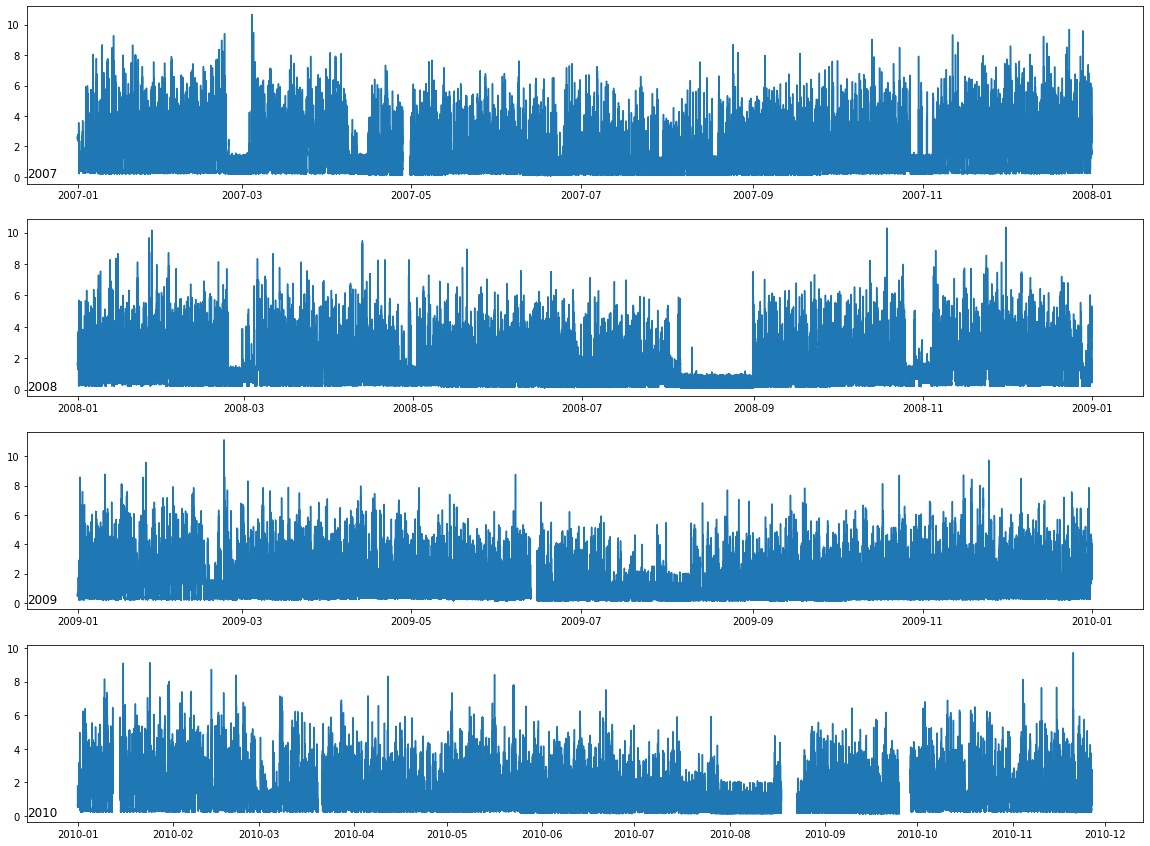

In [5]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
pyplot.figure(figsize=(20, 15))
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# year to plot
	year = years[i]
	# yearly observations
	result = df[str(year)]
	# plot active power for year
	pyplot.plot(result['Global_active_power'])
	# add subplot title 
	pyplot.title(str(year), y=0, loc='left')
pyplot.show()

### Yearly view
* zoom closer to view patterns over 1 year

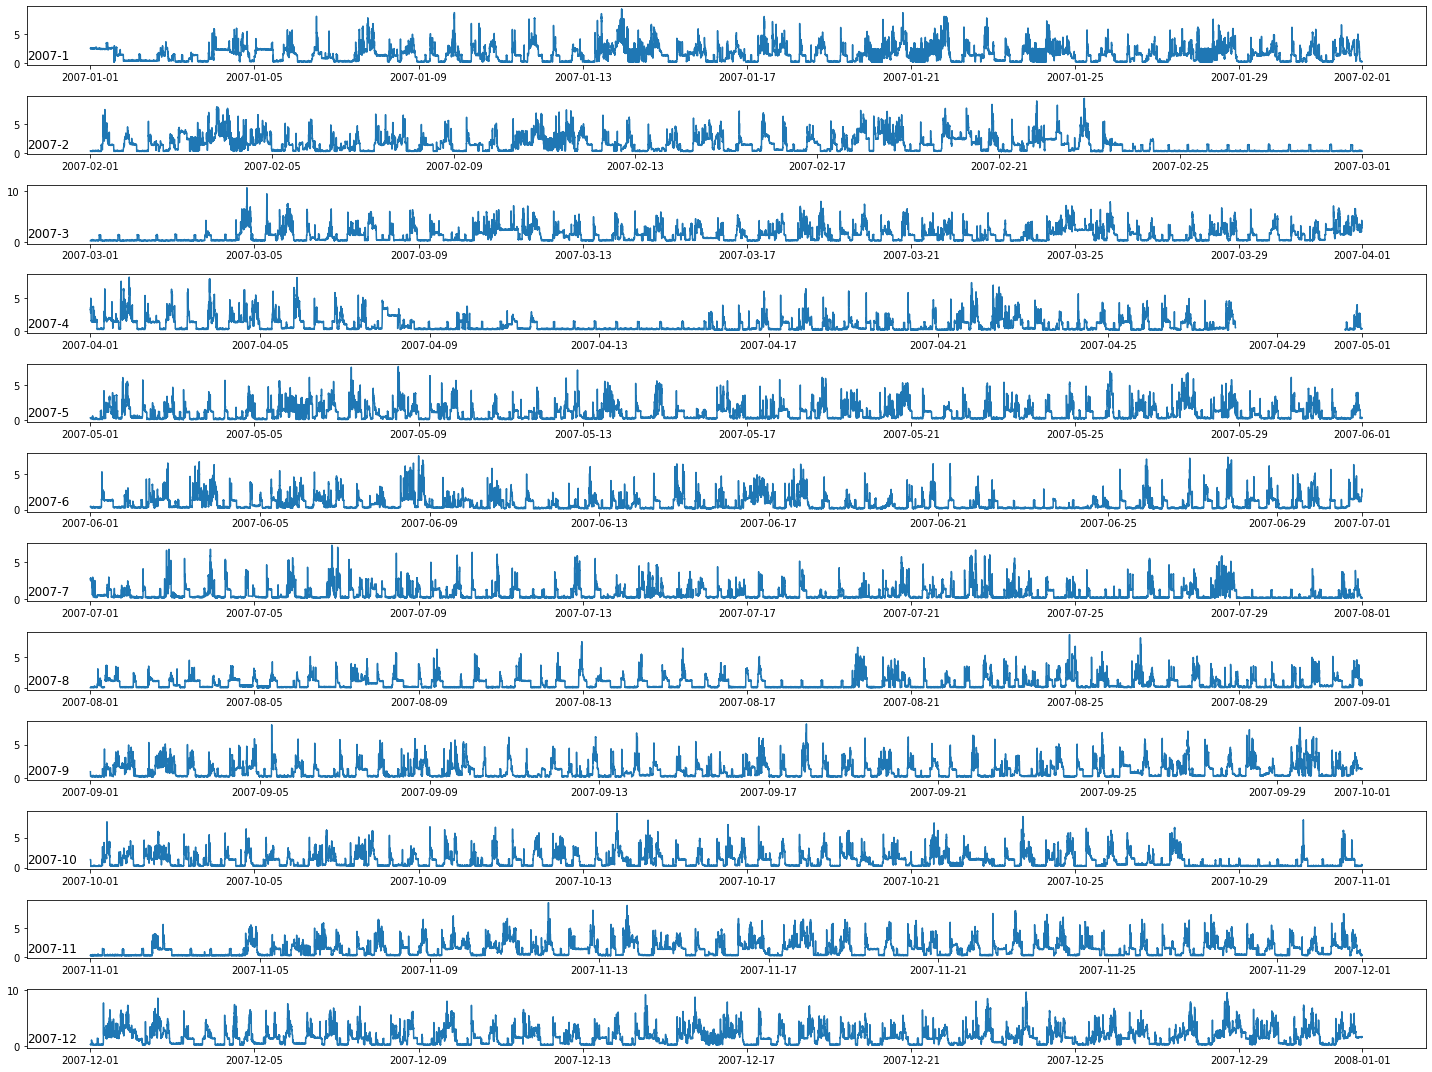

In [7]:
# monthly line plots
months = [x for x in range(1, 13)]

pyplot.figure(figsize=(20, 15))
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# month to plot
	month = '2007-' + str(months[i])
	# all observations for a month
	result = df[month]
	# active power for the month
	pyplot.plot(result['Global_active_power'])
	# add subplot title
	pyplot.title(month, y=0, loc='left')
 
pyplot.tight_layout()
pyplot.show()

### Daily view
* plots for the first 20 days in Jan 2007
* daily consumption usually starts 6-7AM

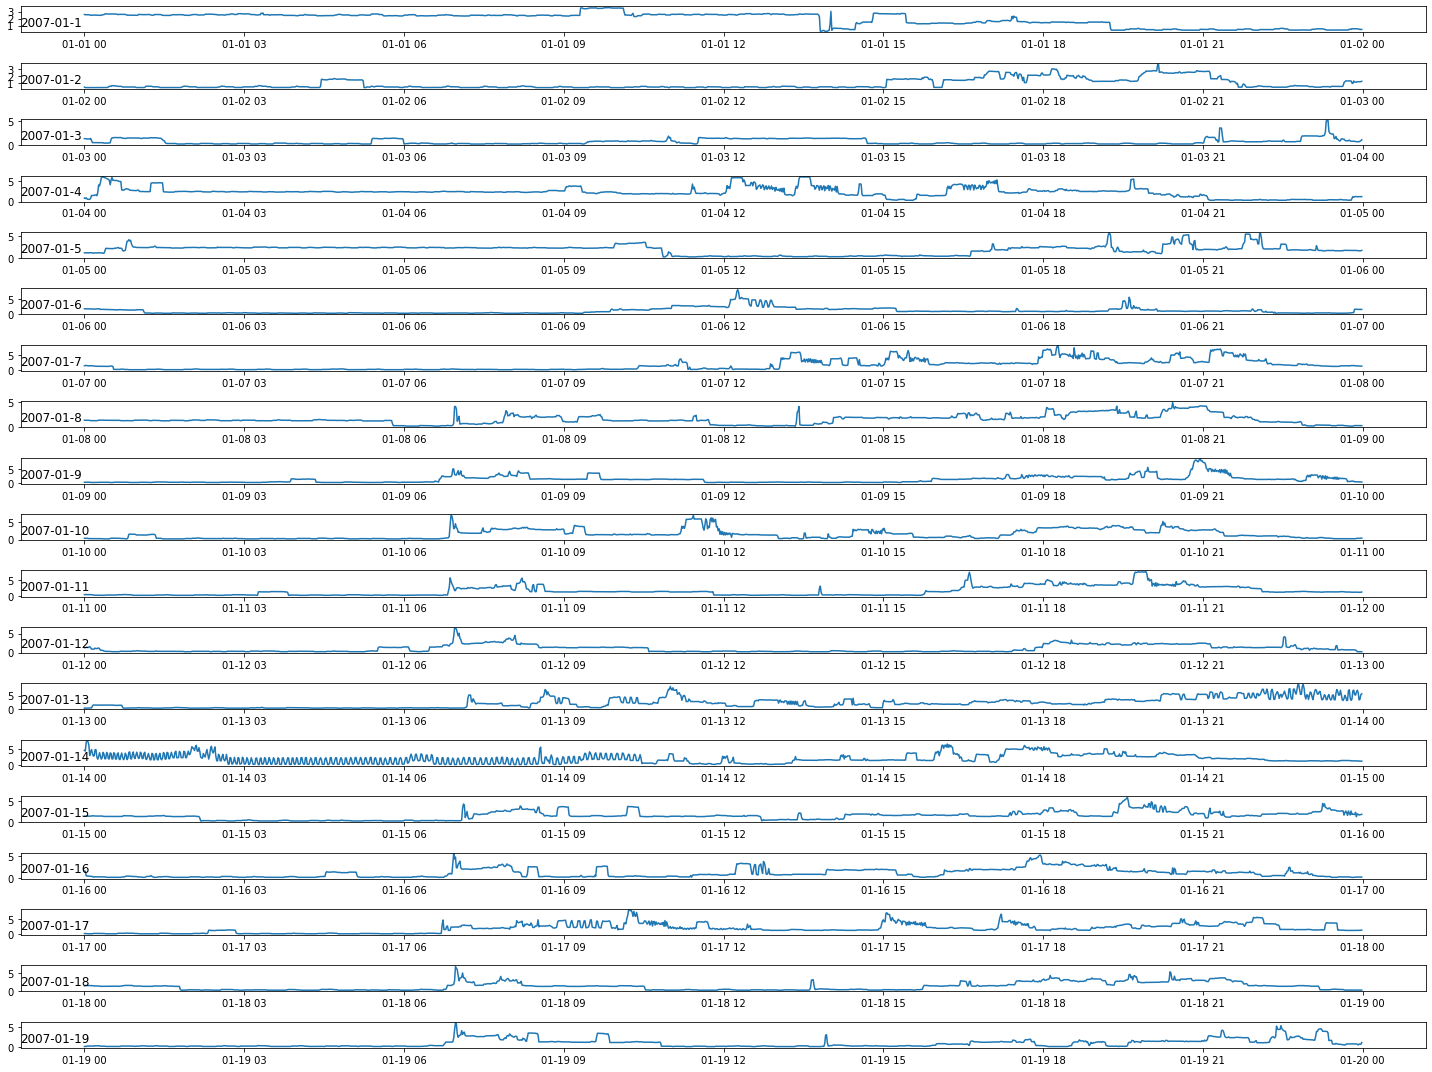

In [8]:
# daily line plots
days = [x for x in range(1, 20)]

pyplot.figure(figsize=(20, 15))
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine day to plot
	day = '2007-01-' + str(days[i])
	# observations for the day
	result = df[day]
	# plot active power for the day
	pyplot.plot(result['Global_active_power'])
	# add subplot title
	pyplot.title(day, y=0, loc='left')

pyplot.tight_layout()
pyplot.show()

# Time Series data distributions

* view distibutions of each variable

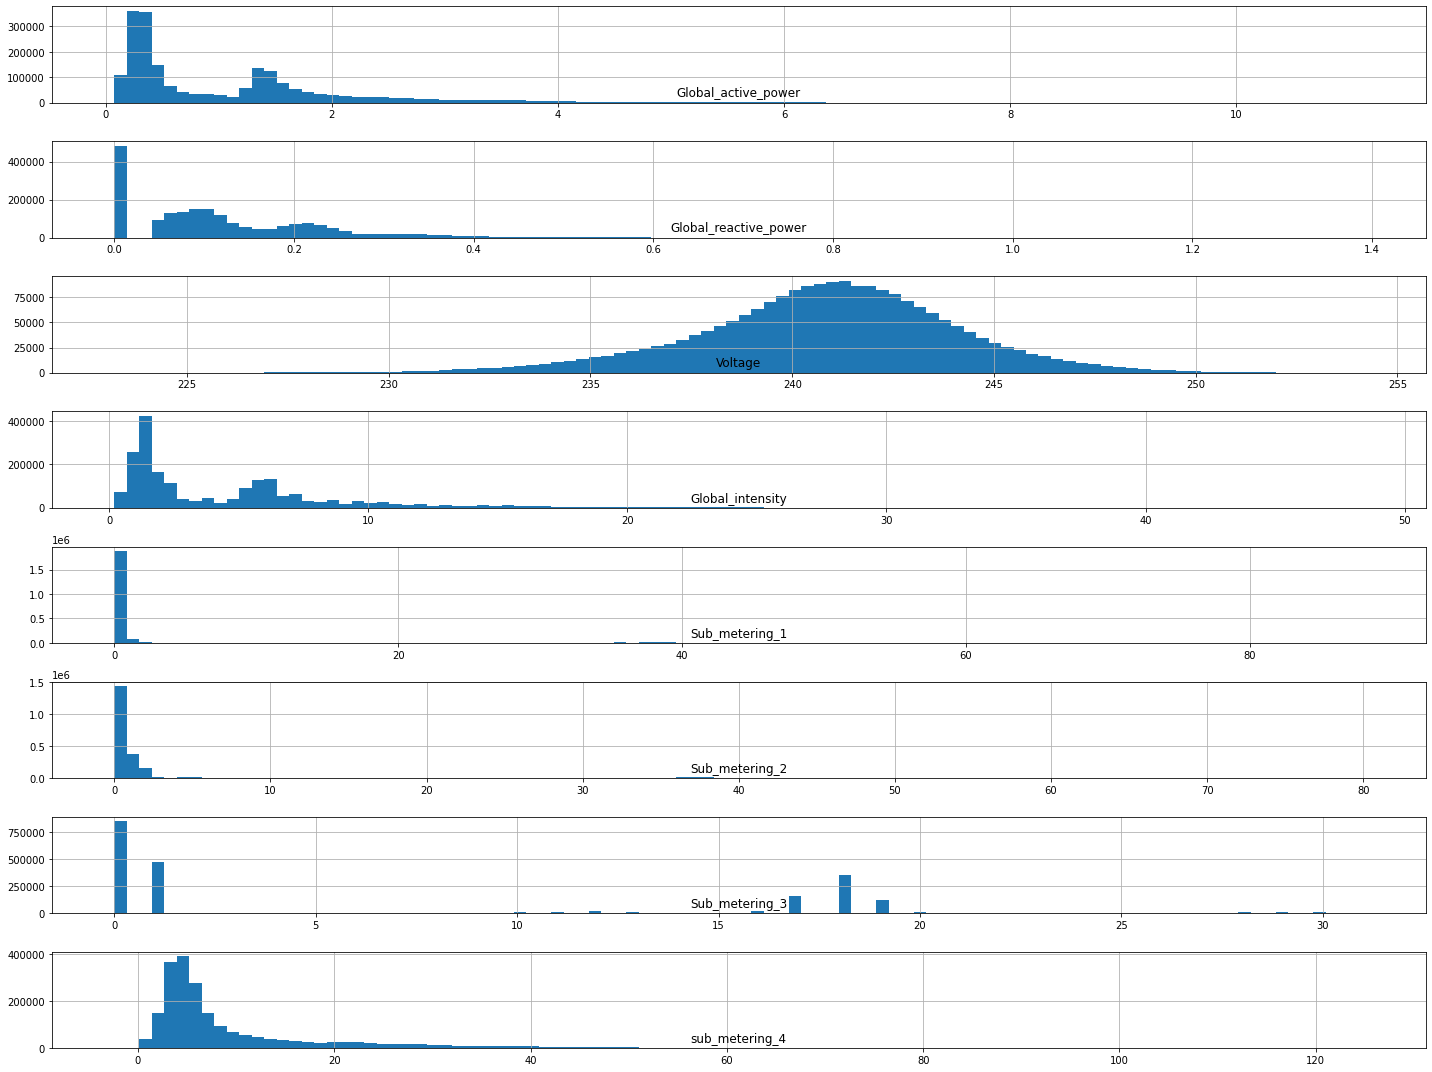

In [9]:
# histogram plot for each variable
pyplot.figure(figsize=(20, 15))

for i in range(len(df.columns)):
	pyplot.subplot(len(df.columns), 1, i+1)
	name = df.columns[i]
	df[name].hist(bins=100)
	pyplot.title(name, y=0)
 
pyplot.tight_layout()
pyplot.show()

## Yearly view: global active power
* active power seems to be bimodal
* look at global active power for all four years

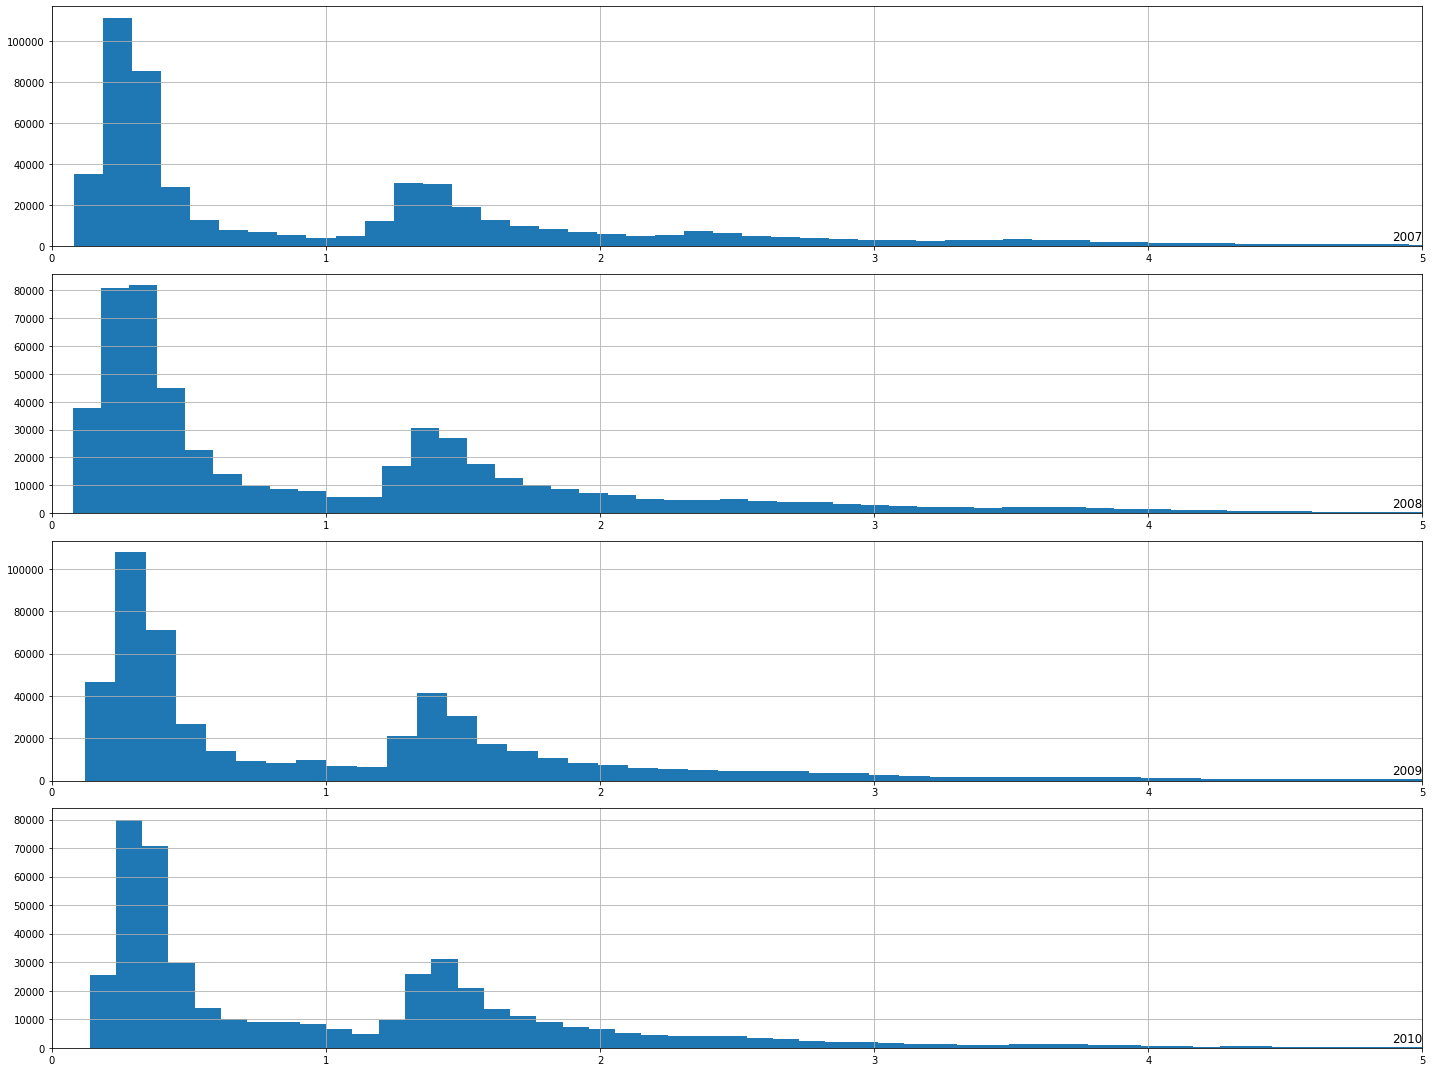

In [10]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']

pyplot.figure(figsize=(20, 15))
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine year to plot
	year = years[i]
	# observations for the year
	result = df[str(year)]
	# plot active power for the year
	result['Global_active_power'].hist(bins=100)
	# set x-axis limits
	ax.set_xlim(0, 5)
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='right')
 
pyplot.tight_layout()
pyplot.show()

## Month-to-month: global active power
* does the bimodal distribution change month-to-month?

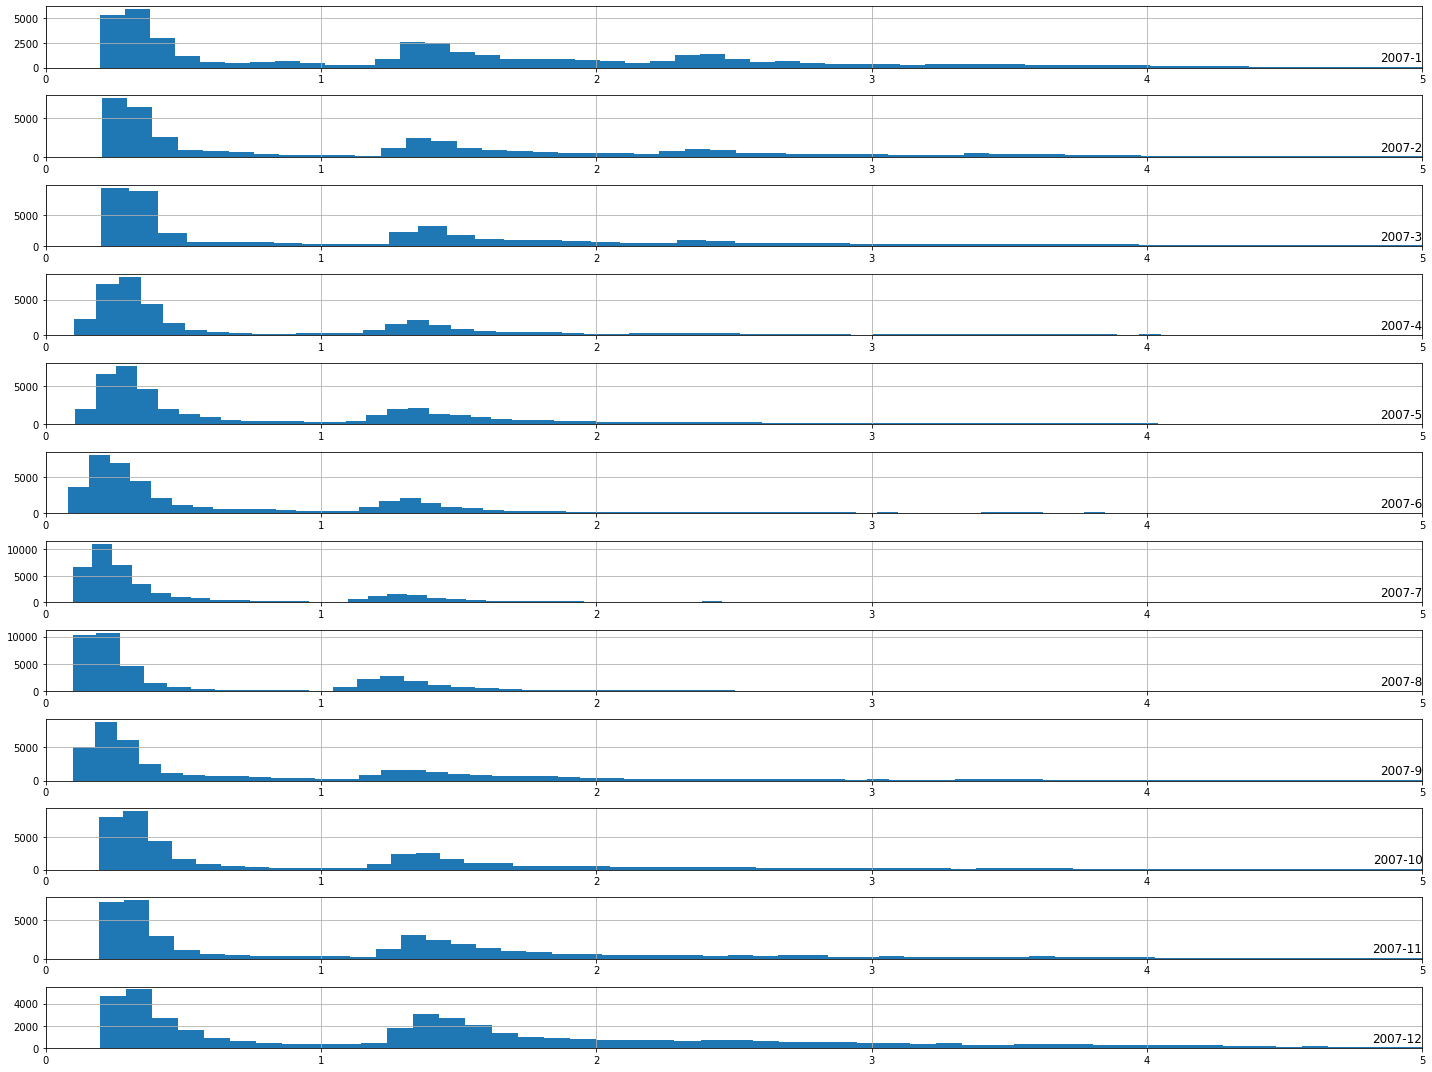

In [11]:
# plot active power for each month
months = [x for x in range(1, 13)]

pyplot.figure(figsize=(20, 15))
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine month to plot
	month = '2007-' + str(months[i])
	# observations for the month
	result = df[month]
	# plot active power for month
	result['Global_active_power'].hist(bins=100)
	# set axis limits
	ax.set_xlim(0, 5)
	# add subplot title
	pyplot.title(month, y=0, loc='right')
 
pyplot.tight_layout()
pyplot.show()

## Thoughts on further data prep

* Daily differencing may be useful to adjust for the daily cycles
* Annual differencing may be useful to adjust for anual cycles
* Normalization should be used to get consistent scales across variables
* Consider engineering a feature for seasonality 